In [1]:
## Import Liabaries

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Import the Dataset


In [2]:
df=pd.read_csv(r"C:\Users\asus\INeuron\Pandas Analysis\train_loan_prediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
# we have 614 rows and 13 features in this dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<Figure size 1152x648 with 0 Axes>

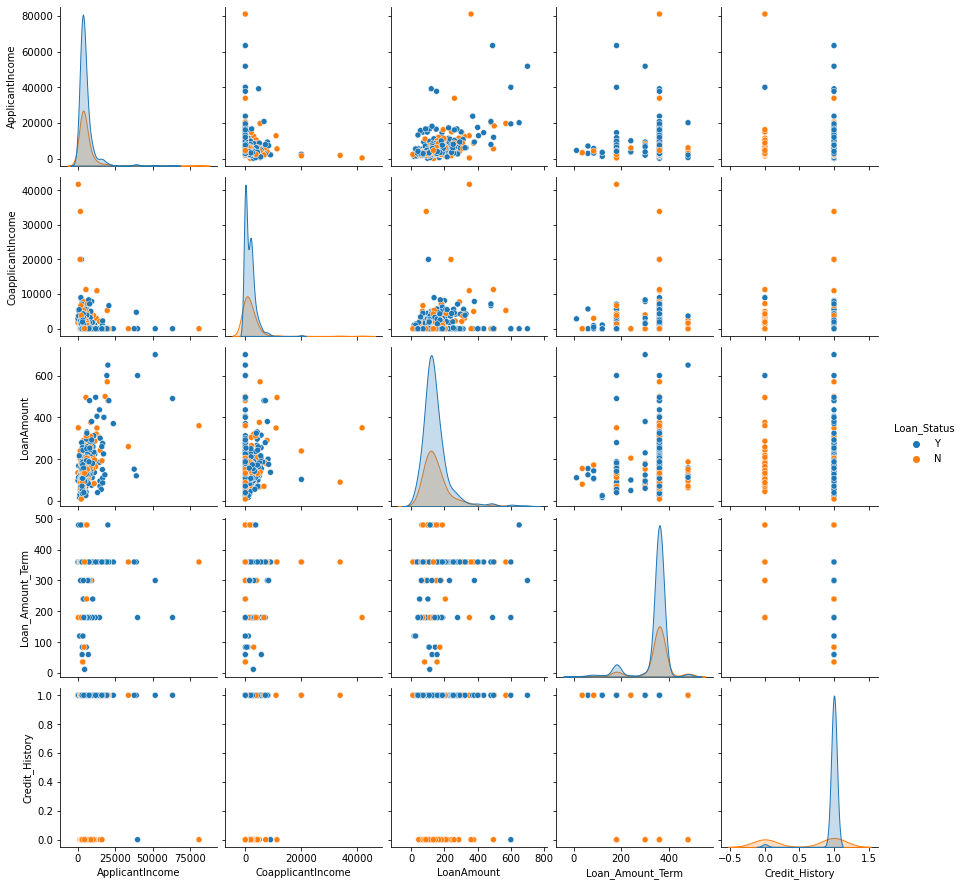

In [6]:
plt.figure(figsize=(16,9))
sns.pairplot(df,hue='Loan_Status')

## Exploratory Data analysis

In [7]:
Categorical_feature=[feature for feature in df.columns if df[feature].dtypes=='O']
len(Categorical_feature)

8

In [8]:
Numerical_feature=[feature for feature in df.columns if df[feature].dtypes!='O']
print("Numerical Features")
Numerical_feature

Numerical Features


['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [9]:
df['Loan_Amount_Term'].nunique()

10

In [10]:
Discrete_fearures=[feature for feature in Numerical_feature if df[feature].nunique()<15]
Discrete_fearures

['Loan_Amount_Term', 'Credit_History']

In [11]:
## discrete Feature :- certain values within the range
## continuous feature :- any value within that range

In [23]:
Continuous_feature = [feature for feature in Numerical_feature if df[feature].nunique()>=15]
Continuous_feature

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

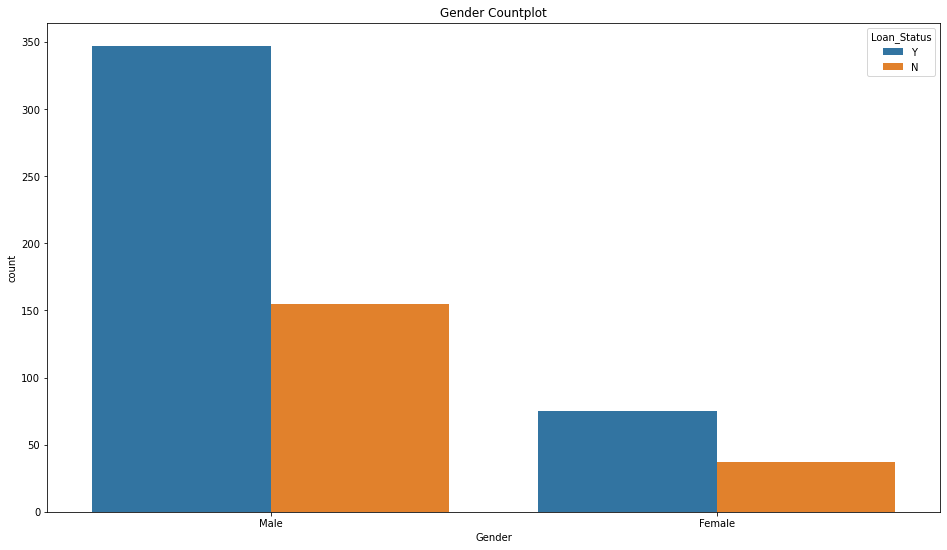

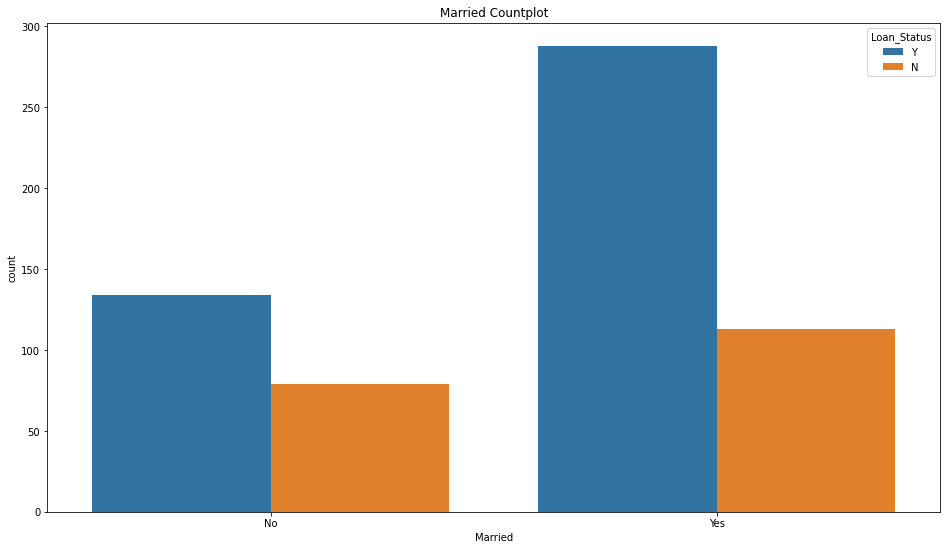

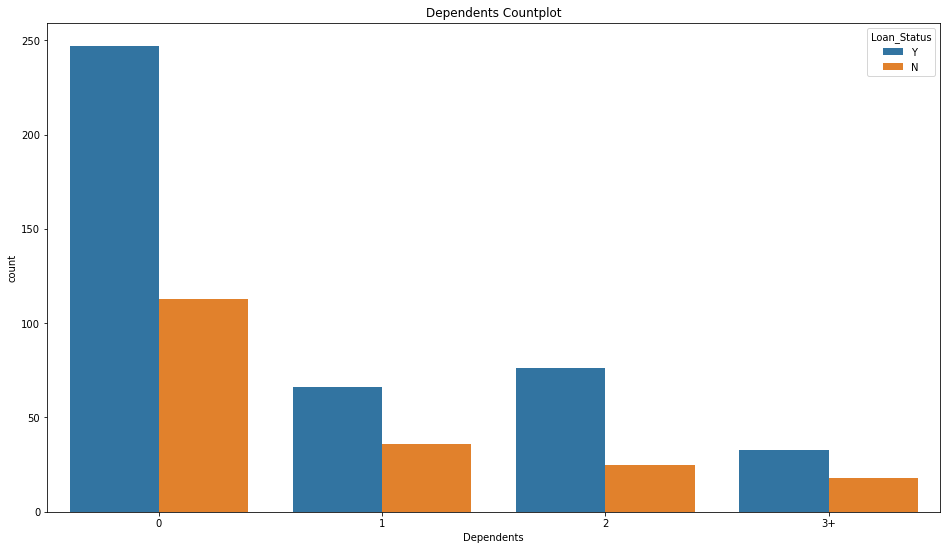

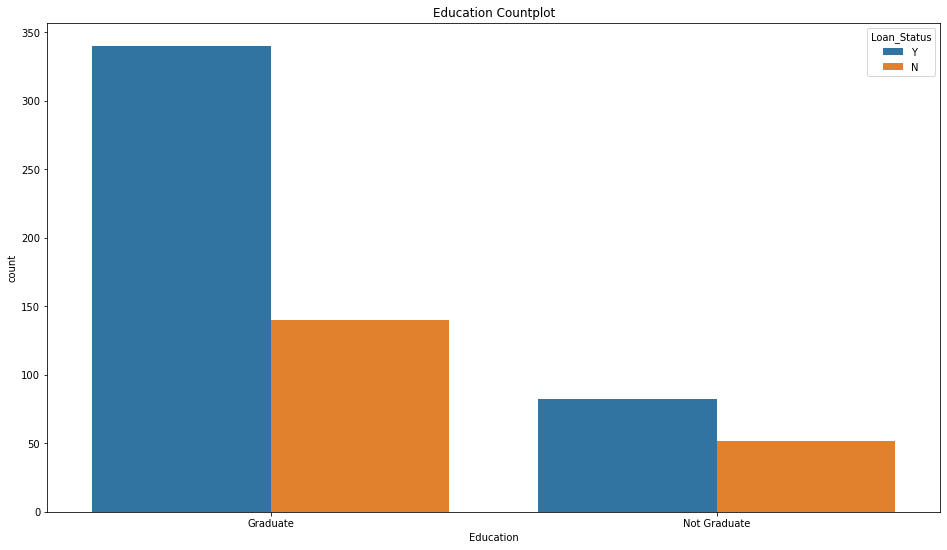

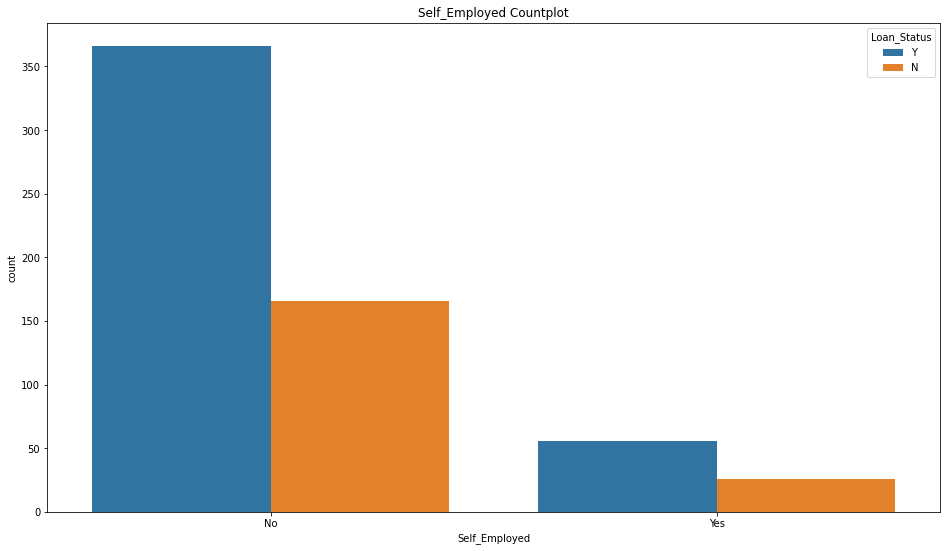

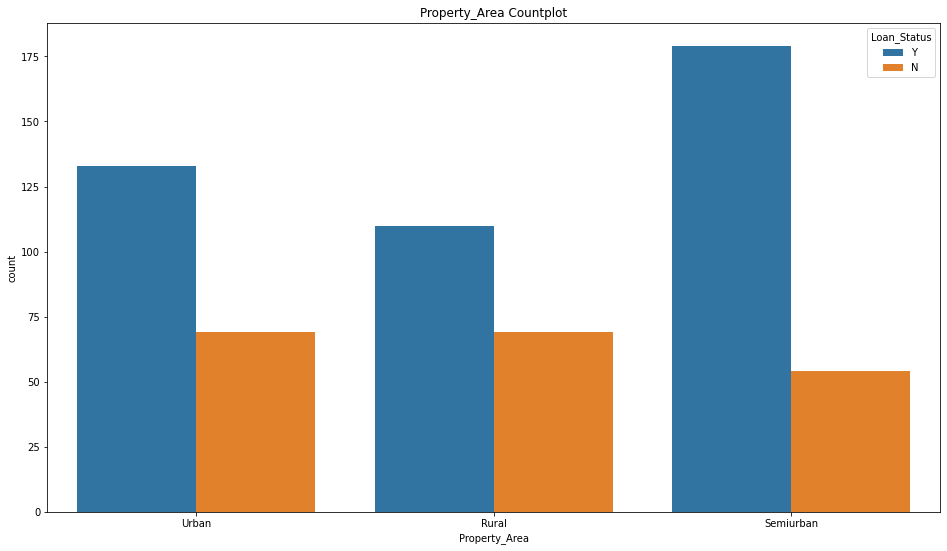

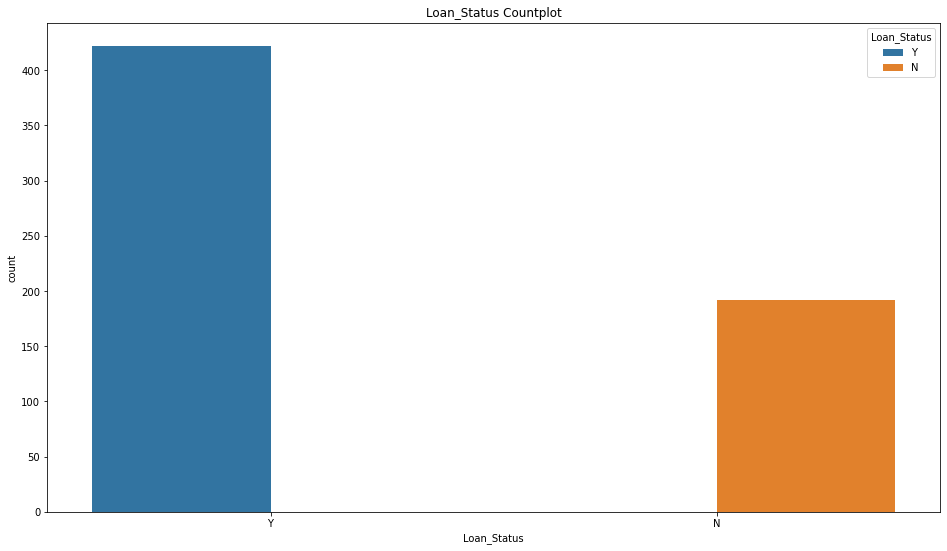

In [24]:
for feature in Categorical_feature[1:]:
    plt.figure(figsize=(16,9))
    sns.countplot(data=df,x=feature,hue='Loan_Status')
    plt.title(f"{feature} Countplot")
    plt.show()

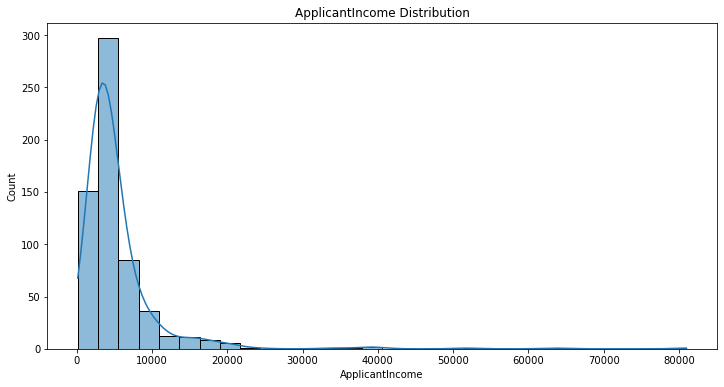

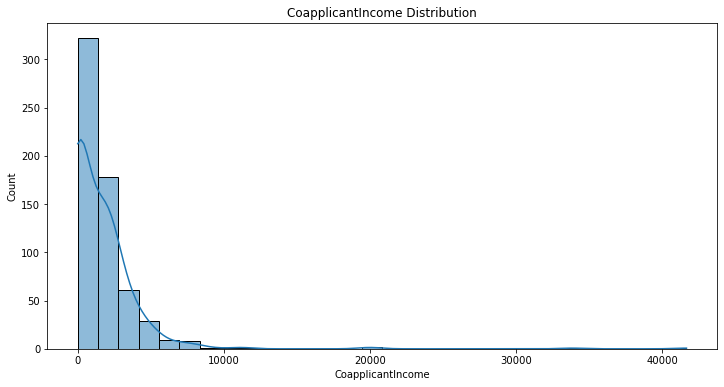

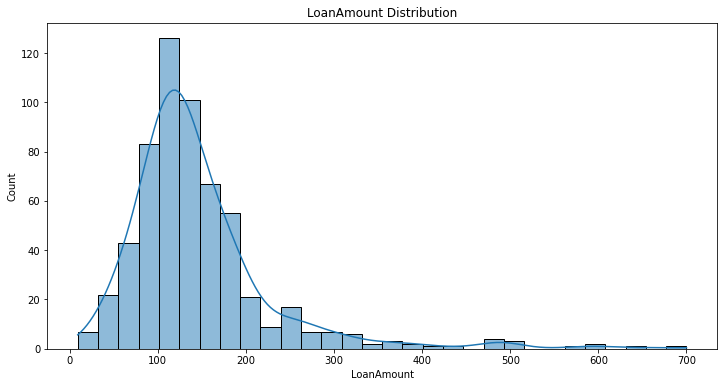

In [25]:
for feature in Continuous_feature:
    plt.figure(figsize=(12,6))
    sns.histplot(df[feature],kde=True,bins=30,)
    plt.title(f"{feature} Distribution")
    plt.show()

## Missing Values

In [26]:
missing_values=df.isnull().sum().sort_values(ascending=False)
per=df.isnull().sum()/(df.isnull().count()).sort_values(ascending=False)
pd.concat([missing_values,per],keys=('Missing_Values','Percentage'),axis=1)


,Missing_Values,Percentage
LoanAmount,22,0.035831
Loan_Status,0,0.000000
Property_Area,0,0.000000
Credit_History,0,0.000000
Loan_Amount_Term,0,0.000000
CoapplicantIncome,0,0.000000
ApplicantIncome,0,0.000000
Self_Employed,0,0.000000
Education,0,0.000000
Dependents,0,0.000000


In [27]:
Feature_nan=[feature for feature in df.columns if df[feature].isnull().sum()>0]
Feature_nan

['LoanAmount']

<AxesSubplot:>

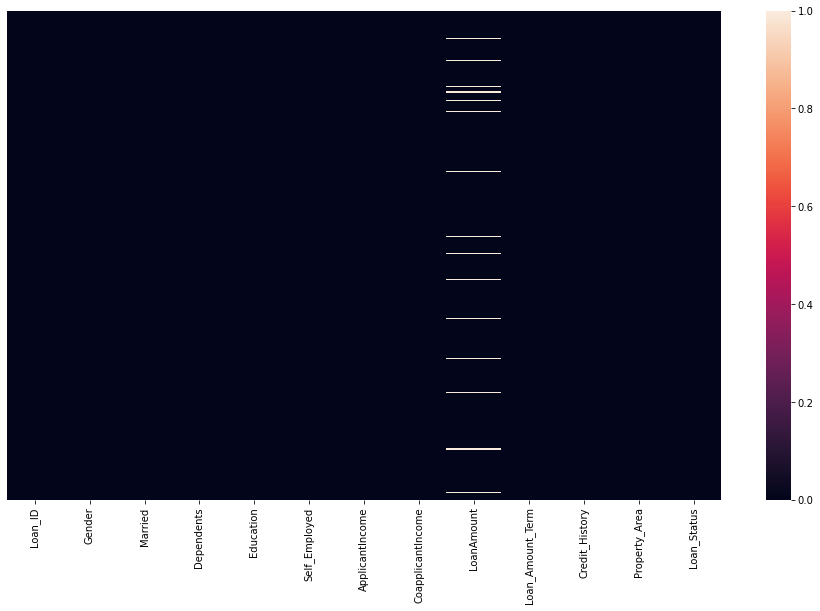

In [28]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull(),yticklabels=False)

In [29]:
for feature in Conitinuous_feature+Discrete_fearures:
    plt.figure(figsize=(16,9))
    sns.boxplot(data=df,y=feature)
    plt.title(f"{feature}")
    plt.show()

NameError: name 'Conitinuous_feature' is not defined

## Filling Categorical & Discrete missing values with mode

In [30]:
 for feature in Categorical_feature+ Discrete_fearures:
        df[feature].fillna(df[feature].mode()[0],inplace=True)

In [31]:
missing_values=df.isnull().sum().sort_values(ascending=False)
per=df.isnull().sum()/(df.isnull().count()).sort_values(ascending=False)
pd.concat([missing_values,per],keys=('Missing_Values','Percentage'),axis=1)


,Missing_Values,Percentage
LoanAmount,22,0.035831
Loan_Status,0,0.000000
Property_Area,0,0.000000
Credit_History,0,0.000000
Loan_Amount_Term,0,0.000000
CoapplicantIncome,0,0.000000
ApplicantIncome,0,0.000000
Self_Employed,0,0.000000
Education,0,0.000000
Dependents,0,0.000000


since there are large numbers of outliers we are gonna fill the null values wirh median

In [33]:
for feature in Continuous_feature:
    df[feature].fillna(df[feature].median(),inplace=True)

In [34]:
missing_values=df.isnull().sum().sort_values(ascending=False)
per=df.isnull().sum()/(df.isnull().count()).sort_values(ascending=False)
pd.concat([missing_values,per],keys=('Missing_Values','Percentage'),axis=1)


,Missing_Values,Percentage
Loan_Status,0,0.0
Property_Area,0,0.0
Credit_History,0,0.0
Loan_Amount_Term,0,0.0
LoanAmount,0,0.0
CoapplicantIncome,0,0.0
ApplicantIncome,0,0.0
Self_Employed,0,0.0
Education,0,0.0
Dependents,0,0.0


## hearmap for knowing the null values

<AxesSubplot:>

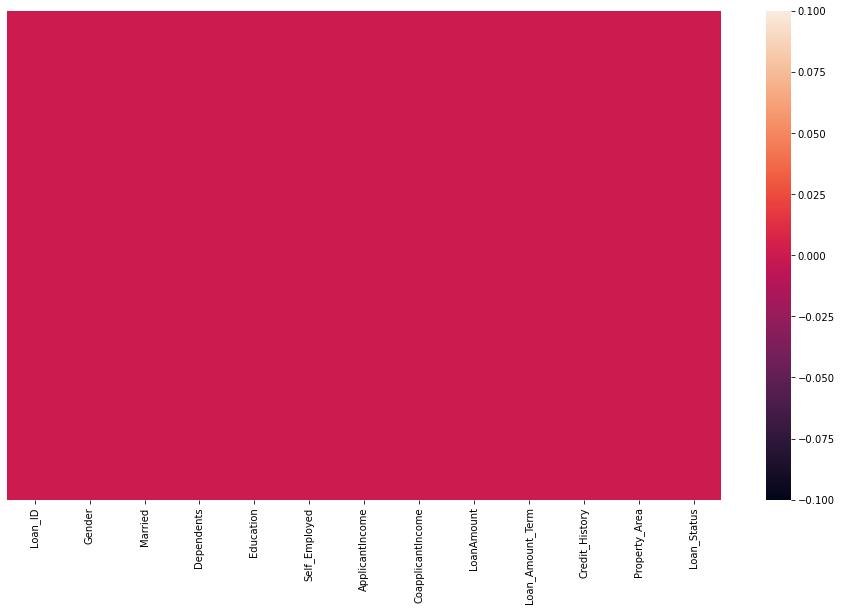

In [35]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull(),yticklabels=False)

In [36]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000


## Hearmap for dataframe correlation

<AxesSubplot:>

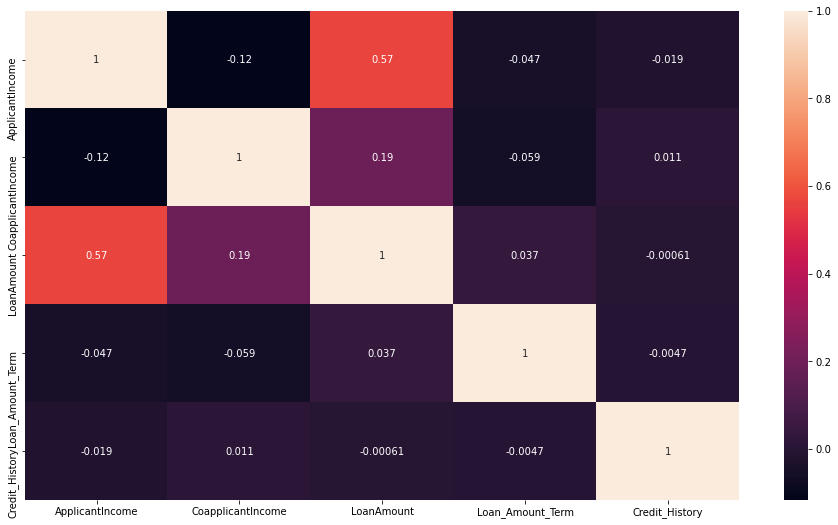

In [37]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),annot=True)

## Feature Engineering

In [38]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

I am removing only Loan_Id column because we have not much features

In [39]:
df.drop('Loan_ID',axis=1,inplace=True)

In [40]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## LabelEncoding Categorical Features

In [41]:
Categorical_feature

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [42]:
Categorical_feature_new=[feature for feature in Categorical_feature if feature not in ['Loan_ID','Loan_Status']]

In [43]:
Categorical_feature_new

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [44]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for feature in Categorical_feature_new:
    df[feature]=encoder.fit_transform(df[feature])
    
    

In [45]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,Y
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,N
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,Y
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,Y
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,Y


## MinMax scalling the dataset

In [47]:
X=df.drop(columns='Loan_Status',axis=1)
y=df['Loan_Status']

In [49]:
col_scale=X.columns

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df[col_scale])

MinMaxScaler()

In [52]:
scaler.transform(df[col_scale]) # returns an array

array([[1.        , 0.        , 0.        , ..., 0.74358974, 1.        ,
        1.        ],
       [1.        , 1.        , 0.33333333, ..., 0.74358974, 1.        ,
        0.        ],
       [1.        , 1.        , 0.        , ..., 0.74358974, 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 0.33333333, ..., 0.74358974, 1.        ,
        1.        ],
       [1.        , 1.        , 0.66666667, ..., 0.74358974, 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.74358974, 0.        ,
        0.5       ]])

## Convert it into the dataframe

In [55]:
data=pd.DataFrame(scaler.transform(df[col_scale]),columns=col_scale)

In [56]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.000000,0.0,0.0,0.070489,0.000000,0.172214,0.74359,1.0,1.0
1,1.0,1.0,0.333333,0.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0
2,1.0,1.0,0.000000,0.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0
3,1.0,1.0,0.000000,1.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0
4,1.0,0.0,0.000000,0.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0


## Feature selection technique

In [58]:
## for feature selection
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [77]:
X=data

In [78]:
df['Loan_Status'].replace('N',0,inplace=True)
df['Loan_Status'].replace('Y',1,inplace=True)


In [79]:
y=df['Loan_Status']

In [81]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [66]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))
# remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [75]:
feature_sel_model.get_support()

array([False,  True, False,  True, False, False, False, False, False,
        True,  True])

In [82]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.000000,0.0,0.0,0.070489,0.000000,0.172214,0.743590,1.0,1.0
1,1.0,1.0,0.333333,0.0,0.0,0.054830,0.036192,0.172214,0.743590,1.0,0.0
2,1.0,1.0,0.000000,0.0,1.0,0.035250,0.000000,0.082489,0.743590,1.0,1.0
3,1.0,1.0,0.000000,1.0,0.0,0.030093,0.056592,0.160637,0.743590,1.0,1.0
4,1.0,0.0,0.000000,0.0,0.0,0.072356,0.000000,0.191027,0.743590,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.000000,0.0,0.0,0.034014,0.000000,0.089725,0.743590,1.0,0.0
610,1.0,1.0,1.000000,0.0,0.0,0.048930,0.000000,0.044863,0.358974,1.0,0.0
611,1.0,1.0,0.333333,0.0,0.0,0.097984,0.005760,0.353111,0.743590,1.0,1.0
612,1.0,1.0,0.666667,0.0,0.0,0.091936,0.000000,0.257598,0.743590,1.0,1.0


##  delete the columns


In [92]:

X.drop(['Gender','Self_Employed','Dependents','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1,inplace=True)

In [93]:
X.head()

,Married,Education,Credit_History,Property_Area
0,0.0,0.0,1.0,1.0
1,1.0,0.0,1.0,0.0
2,1.0,0.0,1.0,1.0
3,1.0,1.0,1.0,1.0
4,0.0,0.0,1.0,1.0


## Training the dataset



In [94]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2)

In [95]:
print("Size of the X_train : ",X_train.shape)
print("Size of the X_test : ",X_test.shape)
print("Size of the y_train : ",y_train.shape)
print("Size of the y_test : ",y_test.shape)


Size of the X_train :  (491, 4)
Size of the X_test :  (123, 4)
Size of the y_train :  (491,)
Size of the y_test :  (123,)


## Apply  the linear classification algorithm

In [96]:
from sklearn.linear_model import RidgeClassifier
ridge_class=RidgeClassifier()
ridge_class.fit(X_train,y_train)
y_pred=ridge_class.predict(X_test)


## Train accuracy

In [97]:
ridge_class.score(X_test,y_pred)*100

100.0

In [98]:
### Logistic 

In [99]:
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()
linear_reg.fit(X_train,y_train)


LinearRegression()

In [100]:
linear_reg.score(X_test,y_test)

0.4188469013886932

In [101]:
from sklearn.linear_model import LogisticRegression
logist=LogisticRegression()
logist.fit(X_train,y_train)
logist.score(X_test,y_test)

0.8455284552845529

In [103]:
logist.predict([X.iloc[0]])

array([1], dtype=int64)